# Clinical Dataset Description

| **Column Attribute** | **Description** | **Units** | **Data Type** |
|-----------------------|-----------------|-----------|---------------|
| **Patient Number**    | Identifies patients by number | -         | Numerical     |
| **Cholesterol**       | Total cholesterol            | mg/dl     | Numerical     |
| **Glucose**           | Fasting blood sugar          | mg/dl     | Numerical     |
| **HDL**               | HDL or good cholesterol      | mg/dl     | Numerical     |
| **Chol/HDL**          | Ratio of total cholesterol to good cholesterol. Desirable result is < 5 | - | Numerical |
| **Age**               | All adult African Americans  | -         | Numerical     |
| **Gender**            | 162 males, 228 females       | -         | Nominal       |
| **Height**            | In inches                   | inches    | Numerical     |
| **Weight**            | In pounds                   | lbs       | Numerical     |
| **BMI**               | 703 x weight (lbs) / [height (inches)]² | - | Numerical |
| **Systolic BP**       | The upper number of blood pressure | mmHg  | Numerical     |
| **Diastolic BP**      | The lower number of blood pressure | mmHg | Numerical     |
| **Waist**             | Measured in inches          | inches    | Numerical     |
| **Hip**               | Measured in inches          | inches    | Numerical     |
| **Waist/Hip**         | Ratio is possibly a stronger risk factor for heart disease than BMI | - | Numerical |
| **Diabetes**          | Yes (60), No (330)          | -         | Nominal       |


# Features Relationships in the Dataset

### 1. Glucose and Diabetes
Hypothesis: Diabetic patients are expected to have significantly higher fasting glucose levels compared to non-diabetic individuals.

### 2. BMI and Diabetes
Hypothesis: Obese and overweight individuals are more likely to be diabetic due to the strong association between body fat and insulin resistance.

### 3. Cholesterol and HDL
Hypothesis: Diabetic patients are likely to have higher total cholesterol levels and lower HDL levels, which increases the risk of cardiovascular complications.

### 4. Blood Pressure (Systolic and Diastolic)
Hypothesis: Diabetic patients are more likely to have elevated systolic and diastolic blood pressure due to the correlation between hypertension and diabetes.

### 5. Age and Diabetes
Hypothesis: The prevalence of diabetes increases with age, particularly among individuals over 45 years.

### 6. Waist-to-Hip Ratio
Hypothesis: A higher waist-to-hip ratio is a stronger indicator of abdominal obesity, which is closely linked to insulin resistance and diabetes.
### 7. Chol/HDL Ratio
Hypothesis: A higher Chol/HDL ratio indicates poorer lipid profiles and is often observed in diabetic patients.

# Importing Libraries and Loading Data

In [6]:
# Essentials
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_path = r"C:\Users\dahab\OneDrive\Desktop\T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making\datasets\clinical\African_American_clinical_dataset.csv"
african_df = pd.read_csv(data_path)

# Exploratory Data Analysis and Cleaning

#### Display basic information about the dataset

In [8]:
print("Dataset Info:")
african_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient number   390 non-null    int64  
 1   Cholesterol      390 non-null    int64  
 2   Glucose          390 non-null    int64  
 3   HDL Chol         390 non-null    int64  
 4   Chol/HDL ratio   390 non-null    float64
 5   Age              390 non-null    int64  
 6   Gender           390 non-null    object 
 7   Height           390 non-null    int64  
 8   Weight           390 non-null    int64  
 9   BMI              390 non-null    float64
 10  Systolic BP      390 non-null    int64  
 11  Diastolic BP     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  Waist/hip ratio  390 non-null    float64
 15  Diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage

#### Display the first few rows of the dataset

In [9]:
print("\nFirst 5 rows of the dataset:")
african_df.head()


First 5 rows of the dataset:


Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age  \
0               1          193       77        49             3.9   19   
1               2          146       79        41             3.6   19   
2               3          217       75        54             4.0   20   
3               4          226       97        70             3.2   20   
4               5          164       91        67             2.4   20   

   Gender  Height  Weight   BMI  Systolic BP  Diastolic BP  waist  hip  \
0  female      61     119  22.5          118            70     32   38   
1  female      60     135  26.4          108            58     33   40   
2  female      67     187  29.3          110            72     40   45   
3  female      64     114  19.6          122            64     31   39   
4  female      70     141  20.2          122            86     32   39   

   Waist/hip ratio     Diabetes  
0             0.84  No diabetes  
1             0.83  No diabetes  
2             0.89  No diabetes  
3             0.79  No diabetes  
4             0.82  No diabetes

#### Check for missing values

In [10]:
print("\nMissing Values:")
print(african_df.isnull().sum())


Missing Values:
Patient number     0
Cholesterol        0
Glucose            0
HDL Chol           0
Chol/HDL ratio     0
Age                0
Gender             0
Height             0
Weight             0
BMI                0
Systolic BP        0
Diastolic BP       0
waist              0
hip                0
Waist/hip ratio    0
Diabetes           0
dtype: int64


#### Check for duplicate rows

In [11]:
print("\nDuplicate Rows:")
print(african_df.duplicated().sum())


Duplicate Rows:
0


#### Basic statistics of the dataset

In [12]:
print("\nDataset Description:")
african_df.describe()


Dataset Description:


Patient number  Cholesterol     Glucose    HDL Chol  Chol/HDL ratio  \
count      390.000000   390.000000  390.000000  390.000000      390.000000   
mean       195.500000   207.230769  107.338462   50.266667        4.524615   
std        112.727548    44.666005   53.798188   17.279069        1.736634   
min          1.000000    78.000000   48.000000   12.000000        1.500000   
25%         98.250000   179.000000   81.000000   38.000000        3.200000   
50%        195.500000   203.000000   90.000000   46.000000        4.200000   
75%        292.750000   229.000000  107.750000   59.000000        5.400000   
max        390.000000   443.000000  385.000000  120.000000       19.300000   

              Age      Height      Weight         BMI  Systolic BP  \
count  390.000000  390.000000  390.000000  390.000000   390.000000   
mean    46.774359   65.951282  177.407692   28.775641   137.133333   
std     16.435911    3.918867   40.407824    6.600915    22.859528   
min     19.000000   52.000000   99.000000   15.200000    90.000000   
25%     34.000000   63.000000  150.250000   24.100000   122.000000   
50%     44.500000   66.000000  173.000000   27.800000   136.000000   
75%     60.000000   69.000000  200.000000   32.275000   148.000000   
max     92.000000   76.000000  325.000000   55.800000   250.000000   

       Diastolic BP       waist         hip  Waist/hip ratio  
count    390.000000  390.000000  390.000000       390.000000  
mean      83.289744   37.869231   42.992308         0.881385  
std       13.498192    5.760947    5.664342         0.073212  
min       48.000000   26.000000   30.000000         0.680000  
25%       75.000000   33.000000   39.000000         0.830000  
50%       82.000000   37.000000   42.000000         0.880000  
75%       90.000000   41.000000   46.000000         0.930000  
max      124.000000   56.000000   64.000000         1.140000

#### Drop the first column ('Patient Number')

In [13]:

data = african_df.iloc[:, 1:]

In [14]:
cat_columns = african_df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Columns:", list(cat_columns))


Categorical Columns: ['Gender', 'Diabetes']


#### Analyze categorical variables (e.g., value counts)


Value counts for Gender:
Gender
female    228
male      162
Name: count, dtype: int64


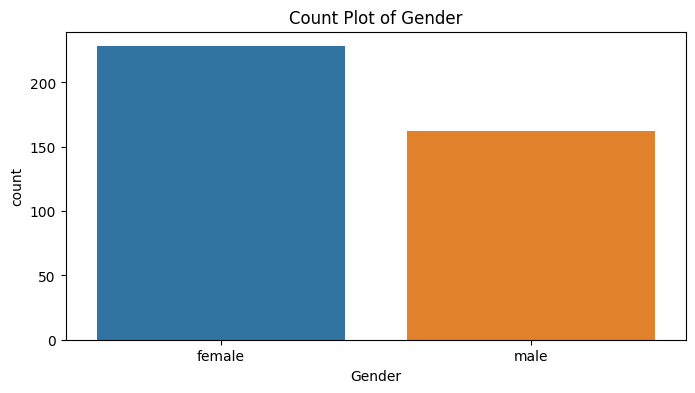


Value counts for Diabetes:
Diabetes
No diabetes    330
Diabetes        60
Name: count, dtype: int64


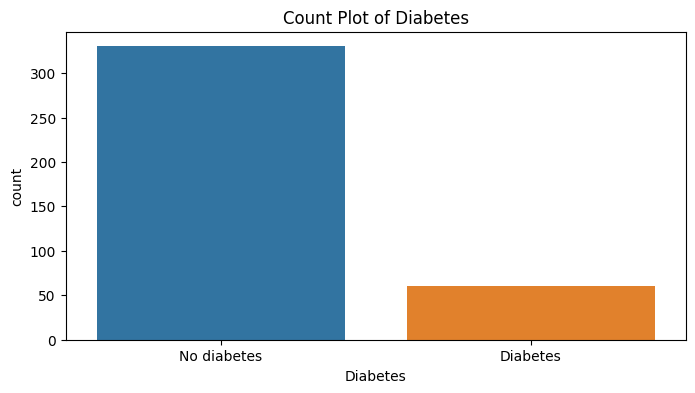

In [15]:
"""for col in cat_columns:
    print(f"\nValue counts for {col}:")
    print(african_df[col].value_counts())
    plt.figure(figsize=(8, 4))
    sns.countplot(data=african_df, x=col, order=african_df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.show()"""

# Data Visualization

#### Visualize distributions of numerical features

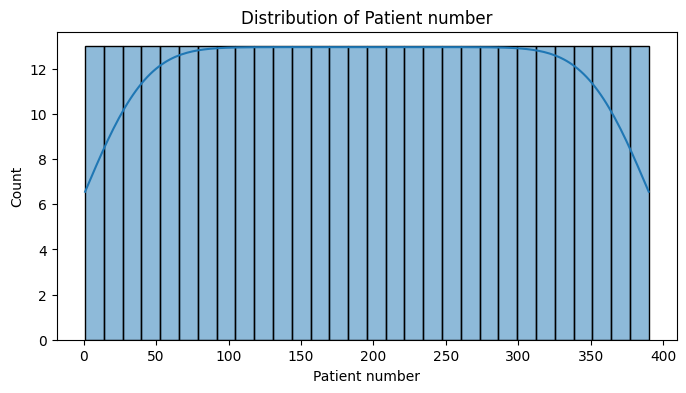

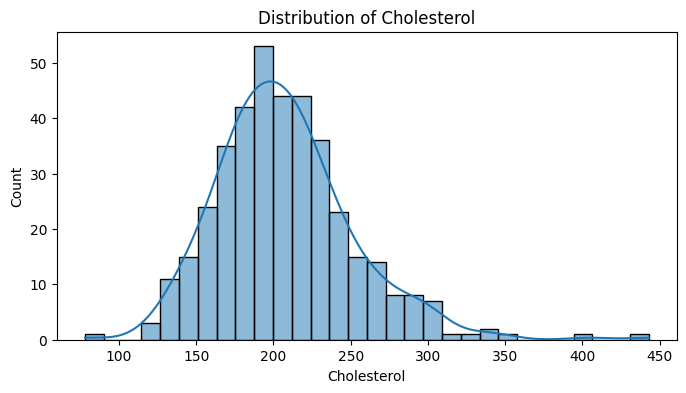

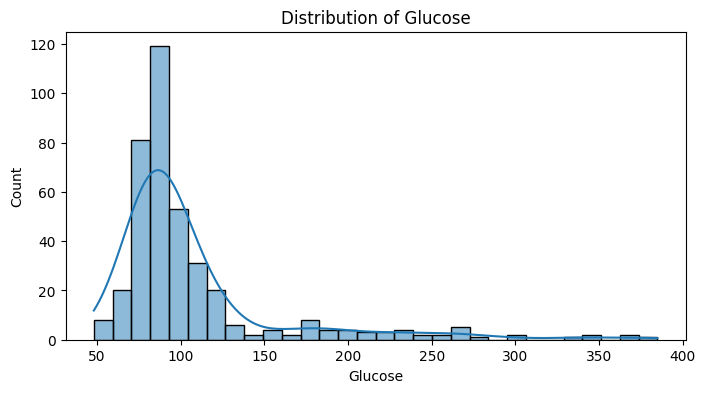

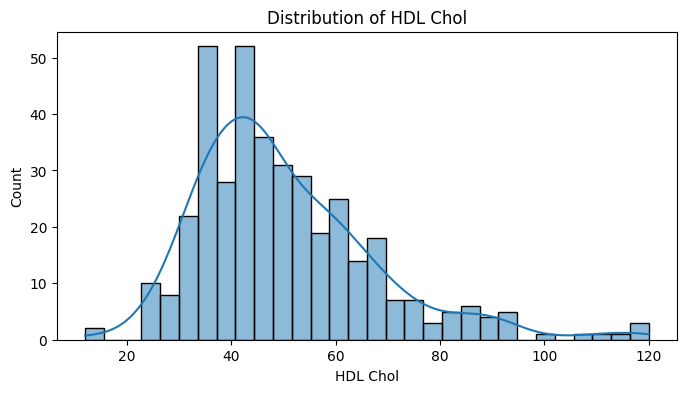

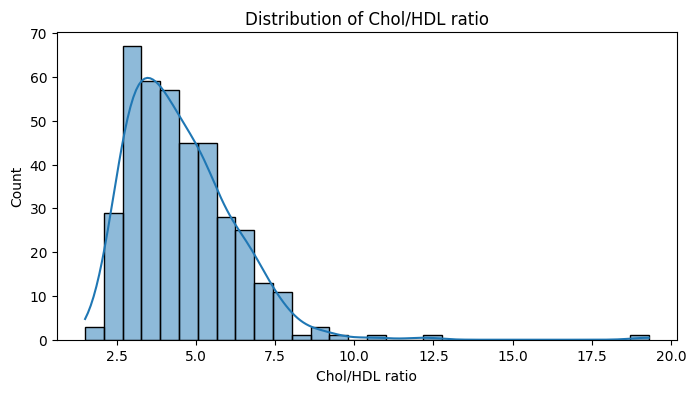

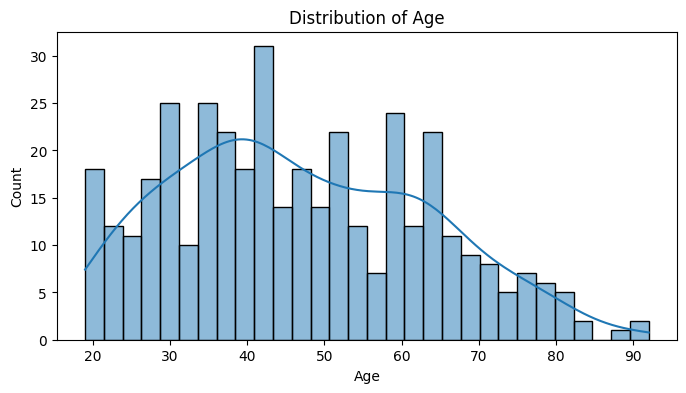

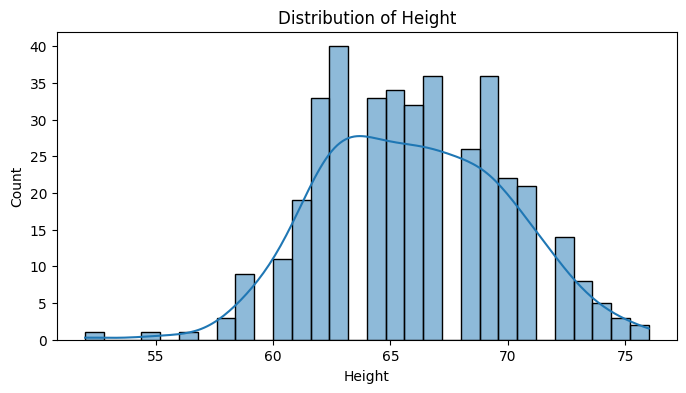

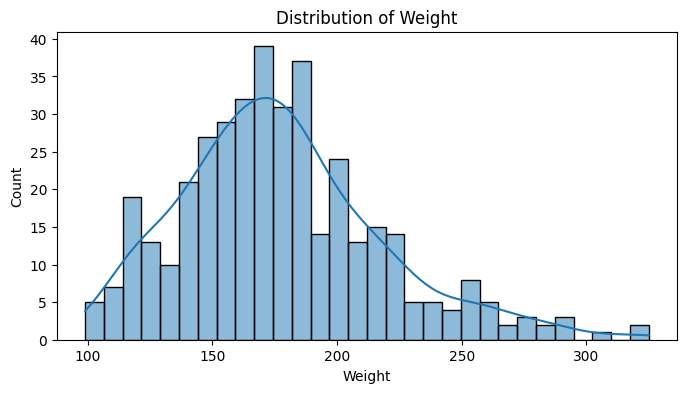

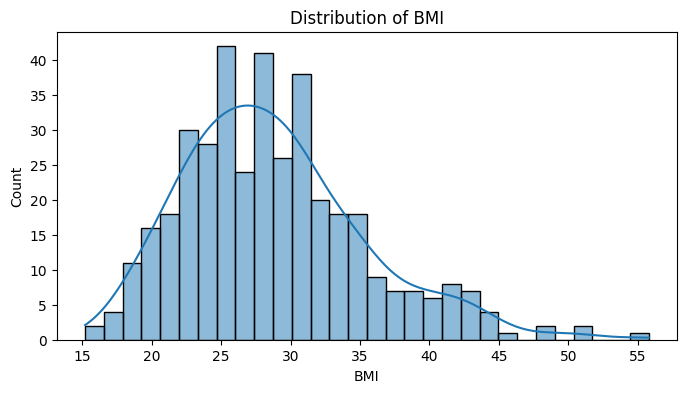

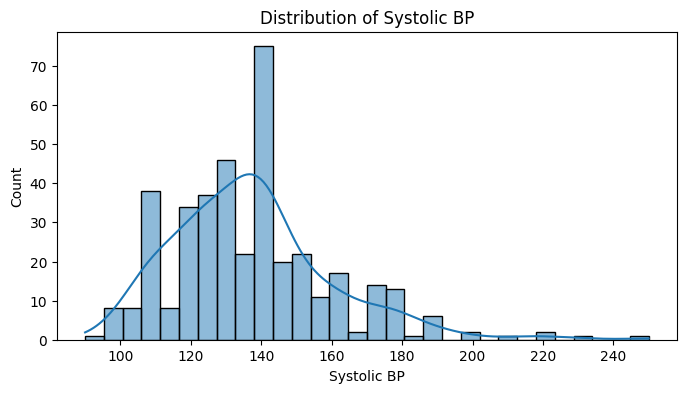

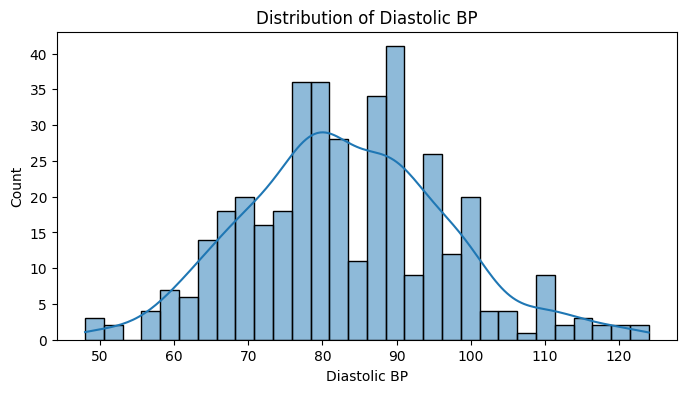

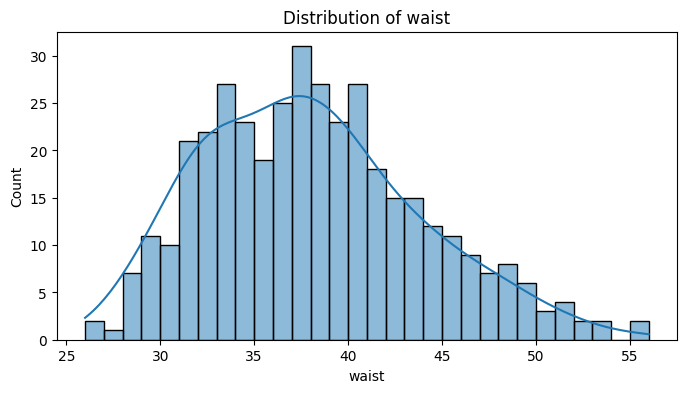

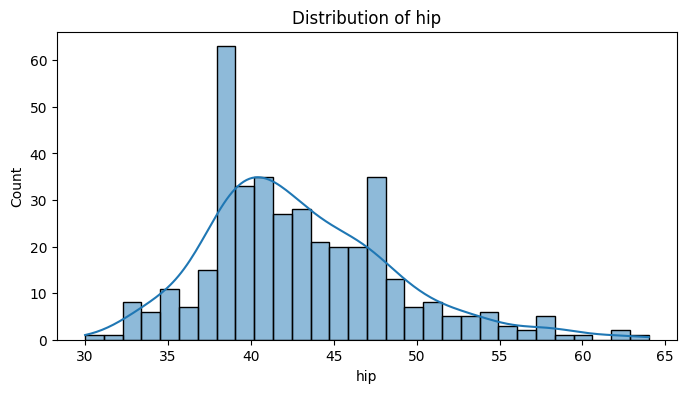

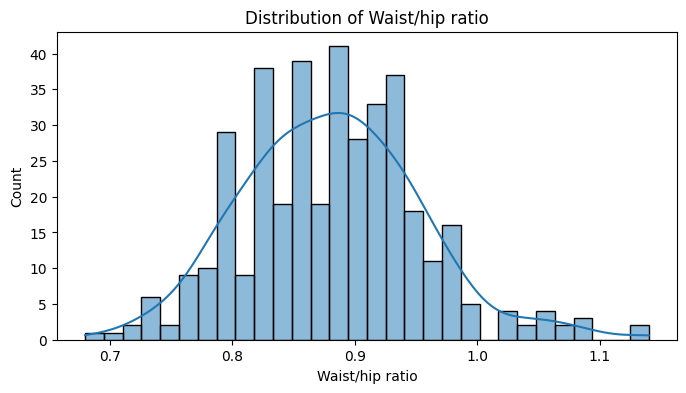

In [ ]:
"""
num_columns = african_df.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(african_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()"""

# Correlation heatmap

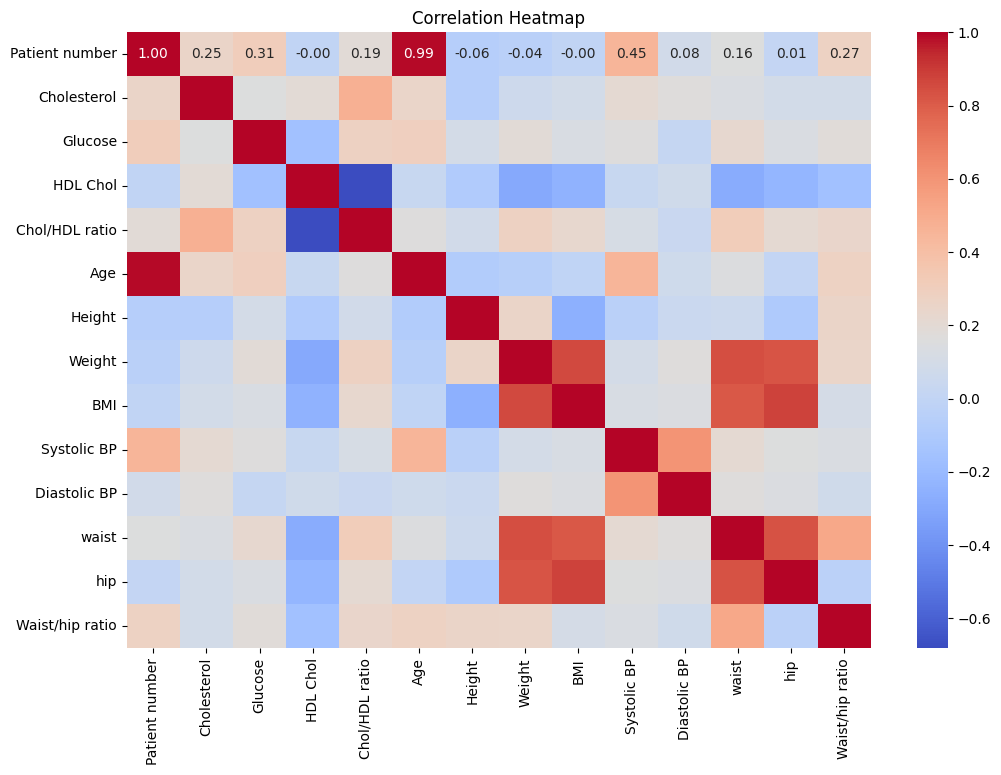

In [ ]:
"""# Select only numerical columns for the correlation matrix
numerical_data = african_df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()"""

### Pairplot for numerical variables

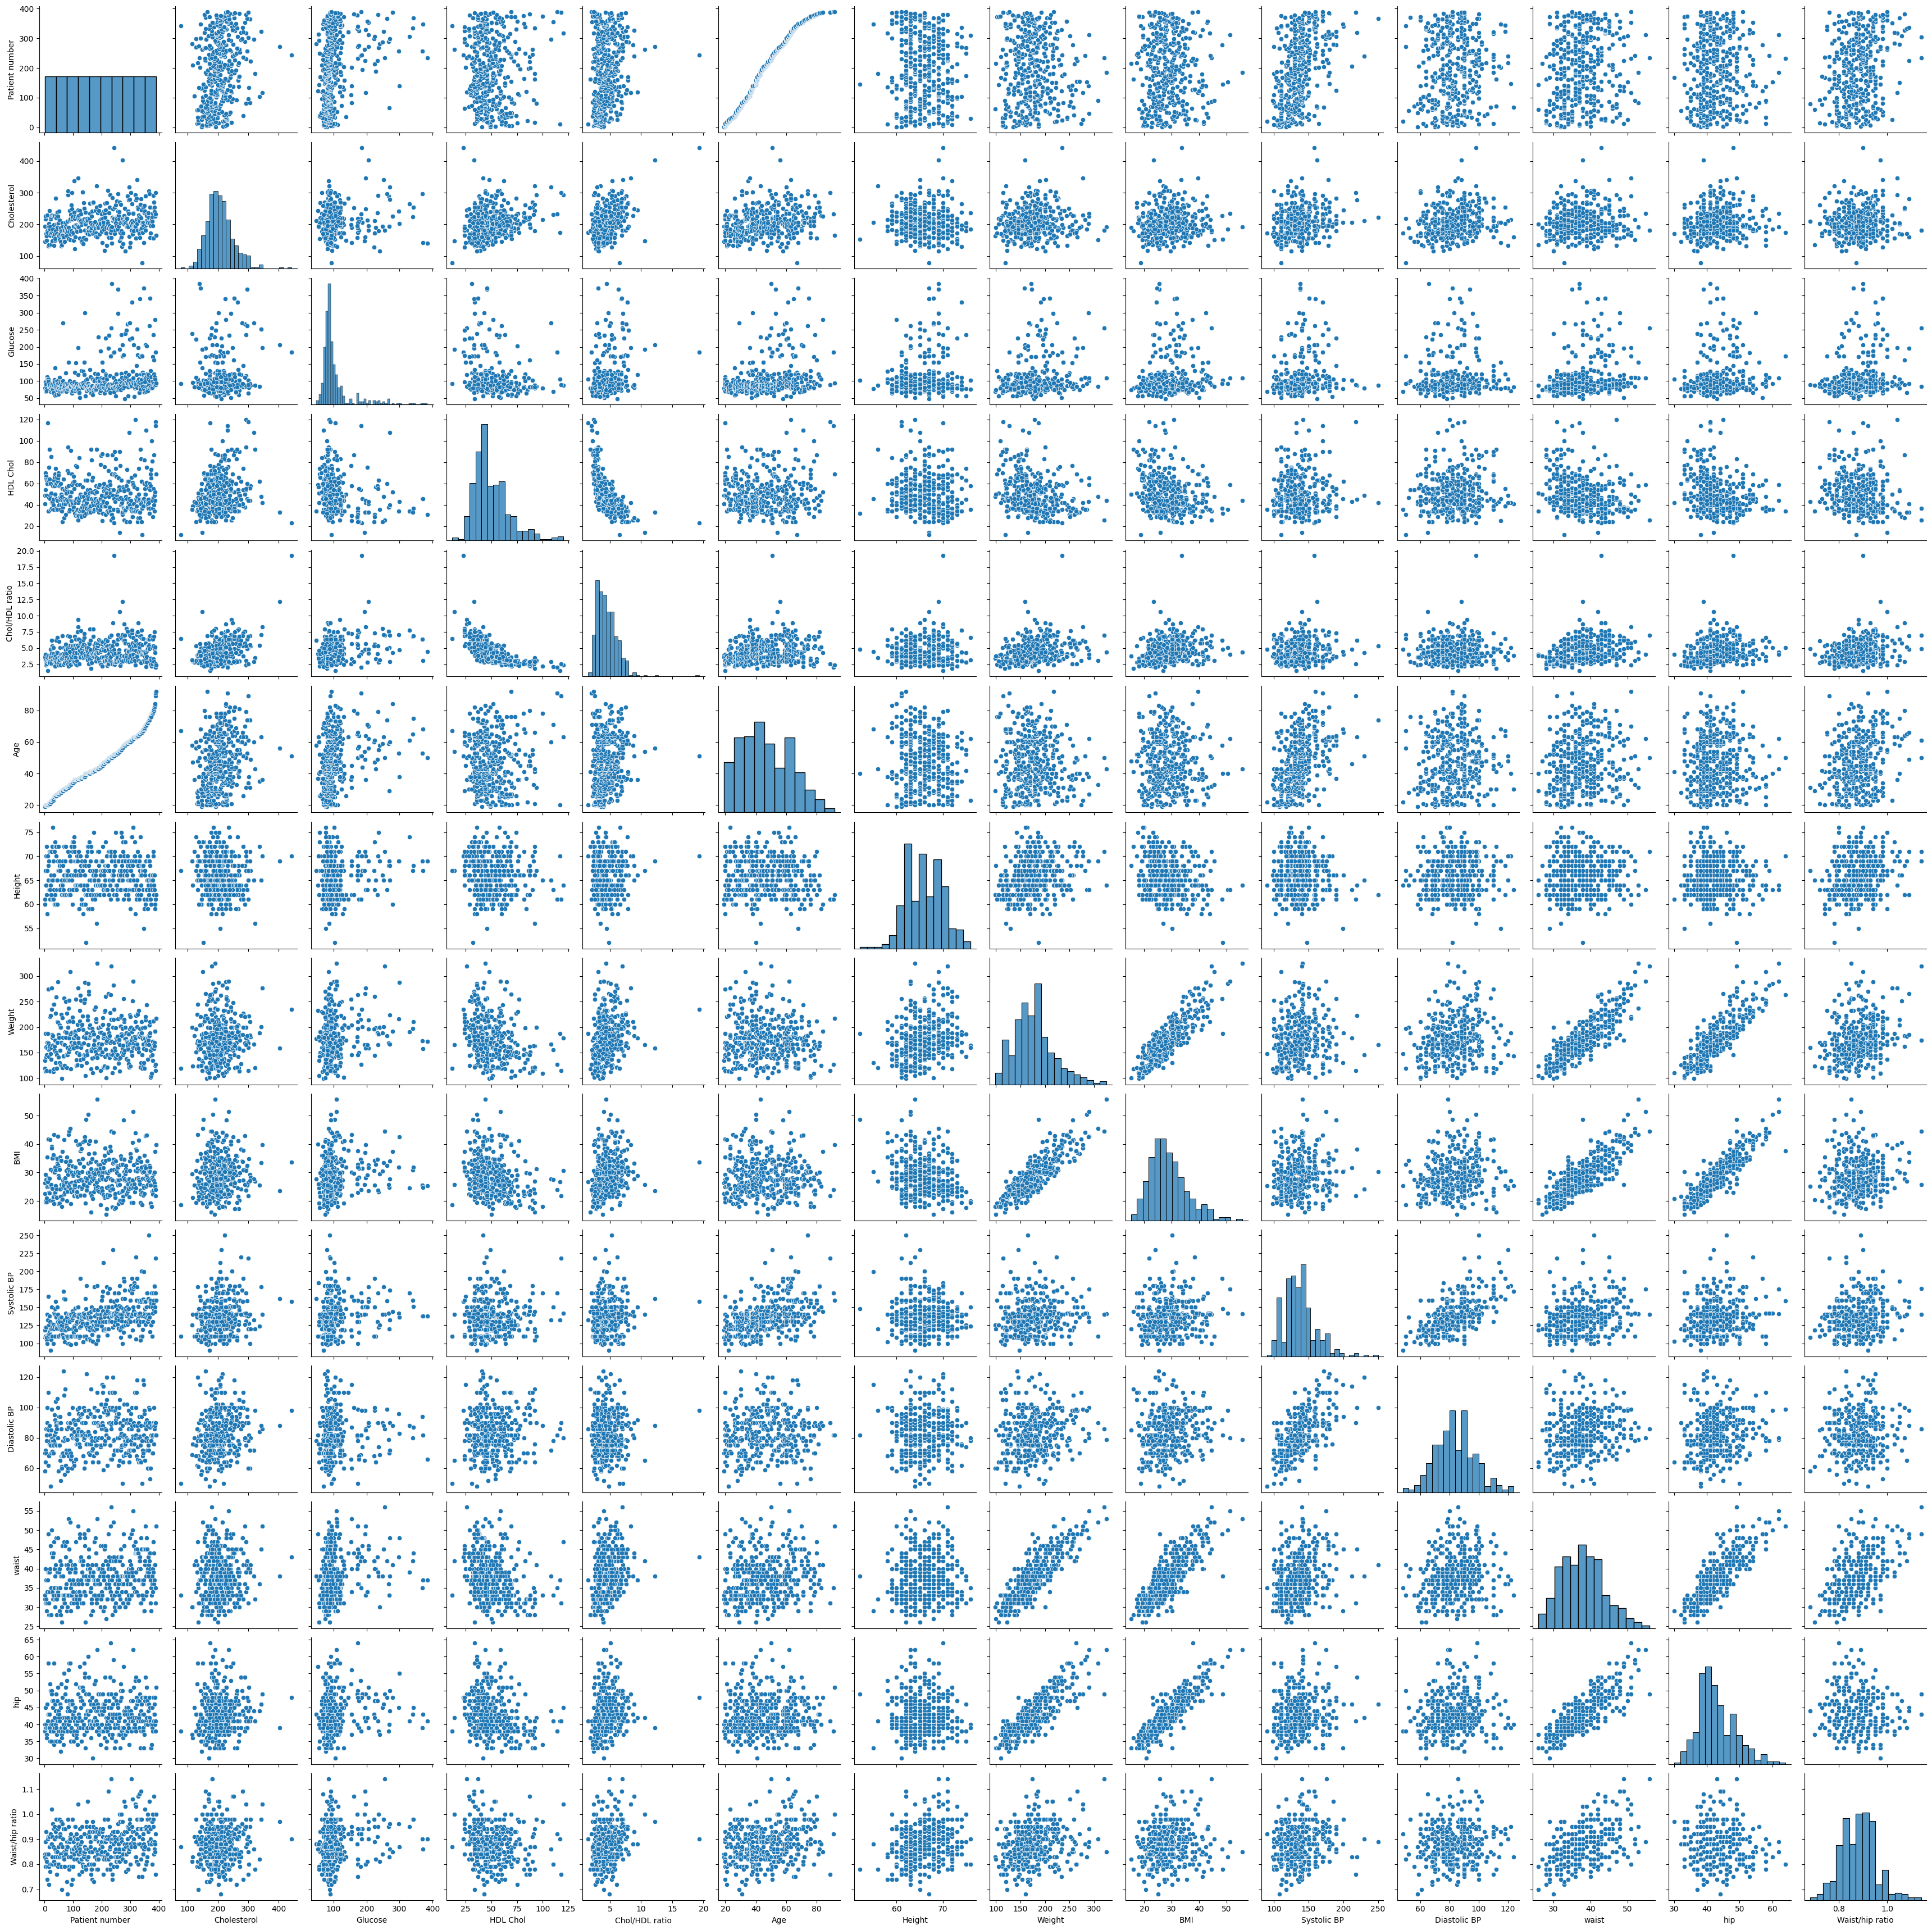

In [ ]:
"""sns.pairplot(african_df[num_columns])
plt.show()"""

### Scatterplot: BMI vs Waist/Hip Ratio

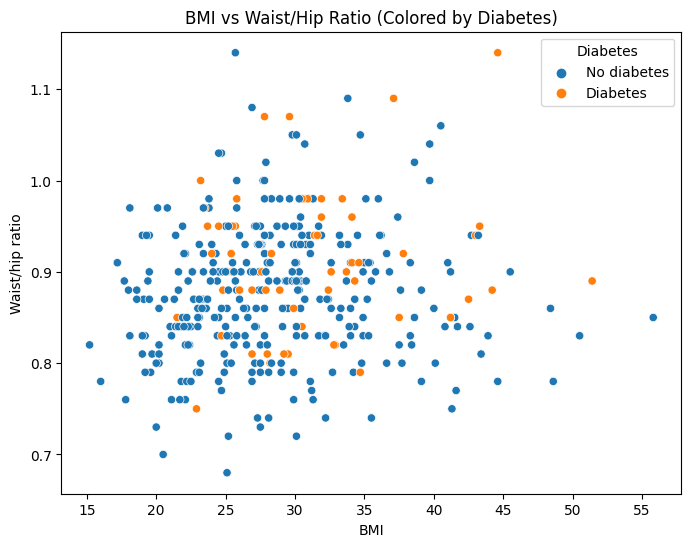

In [ ]:
"""plt.figure(figsize=(8, 6))
sns.scatterplot(data=african_df, x="BMI", y="Waist/hip ratio", hue="Diabetes")
plt.title("BMI vs Waist/Hip Ratio (Colored by Diabetes)")
plt.show()"""

### Boxplot: Systolic BP by Gender

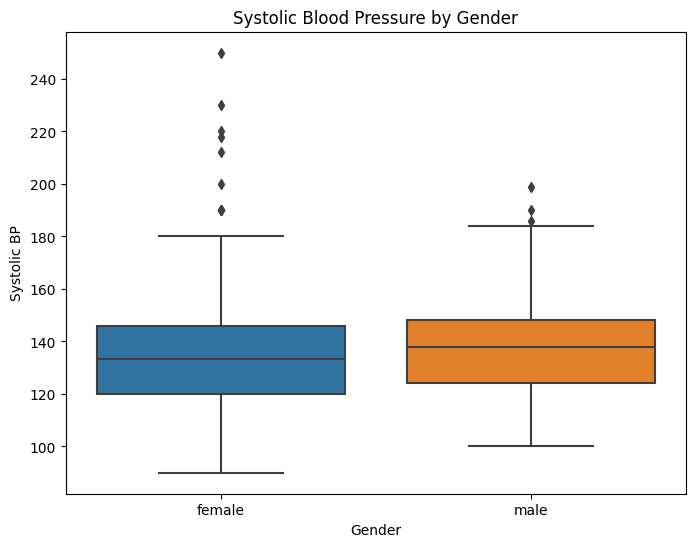

In [ ]:
"""# Boxplot: Systolic BP by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=african_df, x="Gender", y="Systolic BP")
plt.title("Systolic Blood Pressure by Gender")
plt.show()"""

### Boxplot: Cholesterol by Gender

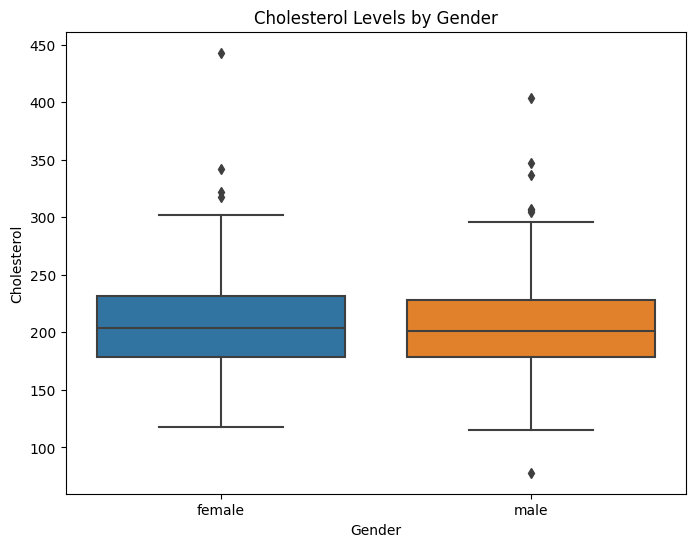

In [ ]:
"""# Boxplot: Cholesterol by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=african_df, x="Gender", y="Cholesterol")
plt.title("Cholesterol Levels by Gender")
plt.show()"""

### Glucose vs Age (colored by Diabetes)

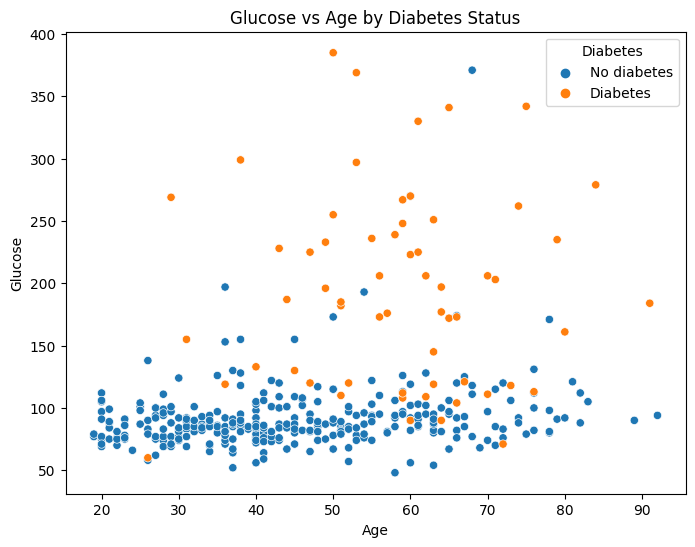

In [ ]:
"""### Glucose vs Age (colored by Diabetes)
if 'Glucose' in african_df.columns and 'Age' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='Age', y='Glucose', hue='Diabetes')
    plt.title("Glucose vs Age by Diabetes Status")
    plt.show()"""

### Waist vs Hip (colored by Gender)

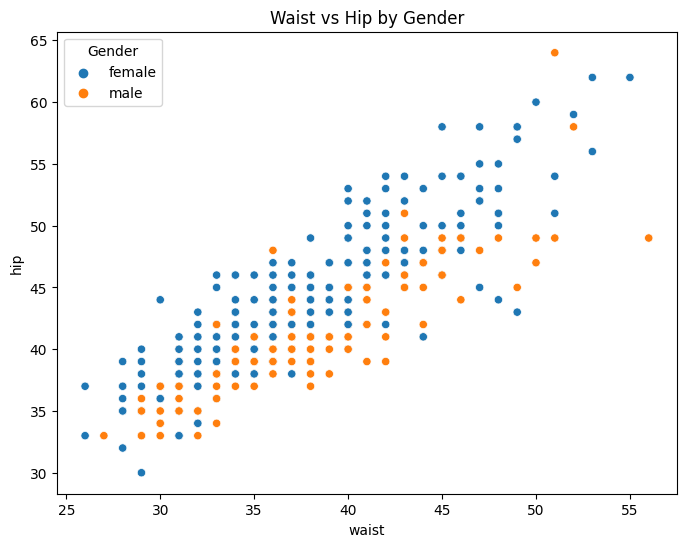

In [ ]:
"""### Waist vs Hip (colored by Gender)
if 'waist' in african_df.columns and 'hip' in african_df.columns and 'Gender' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='waist', y='hip', hue='Gender')
    plt.title("Waist vs Hip by Gender")
    plt.show()"""

### Chol/HDL Ratio vs Age

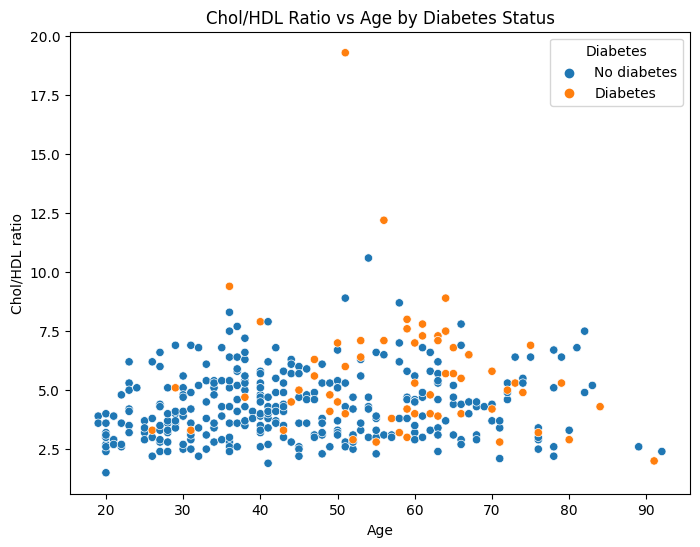

In [ ]:
"""### Chol/HDL Ratio vs Age
if 'Chol/HDL ratio' in african_df.columns and 'Age' in african_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='Age', y='Chol/HDL ratio', hue='Diabetes')
    plt.title("Chol/HDL Ratio vs Age by Diabetes Status")
    plt.show()"""

### Glucose Distribution by Diabetes Status

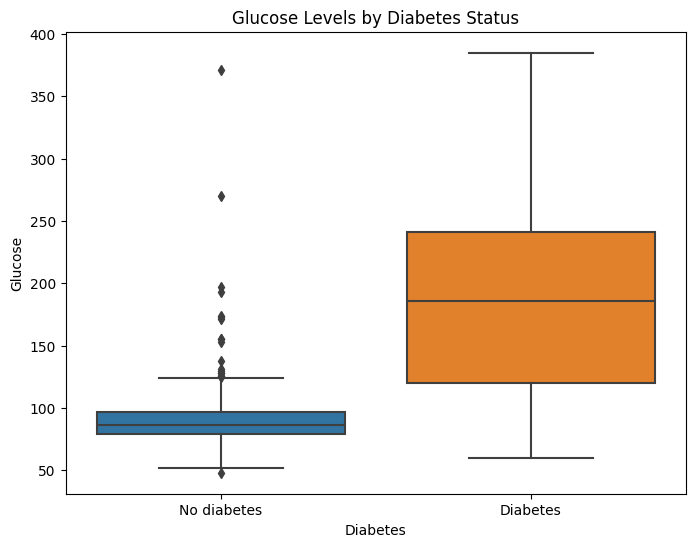

In [ ]:
"""### Glucose Distribution by Diabetes Status
if 'Glucose' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=african_df, x='Diabetes', y='Glucose')
    plt.title("Glucose Levels by Diabetes Status")
    plt.show()"""

### BMI Categories and Diabetes

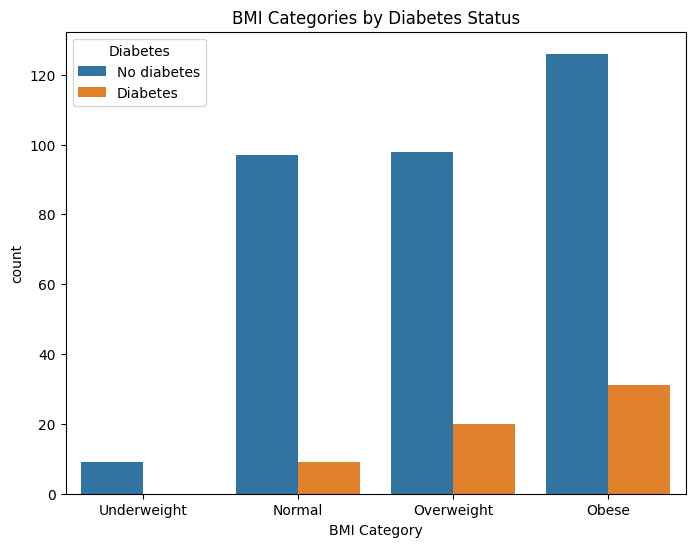

In [ ]:
"""### BMI Categories and Diabetes
if 'BMI' in african_df.columns and 'Diabetes' in cat_columns:
    def bmi_category(bmi):
        if bmi < 18.5:
            return "Underweight"
        elif 18.5 <= bmi < 24.9:
            return "Normal"
        elif 25 <= bmi < 29.9:
            return "Overweight"
        else:
            return "Obese"

    african_df['BMI Category'] = african_df['BMI'].apply(bmi_category)
    plt.figure(figsize=(8, 6))
    sns.countplot(data=african_df, x='BMI Category', hue='Diabetes', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
    plt.title("BMI Categories by Diabetes Status")
    plt.show()"""

### Cholesterol vs HDL (colored by Diabetes)

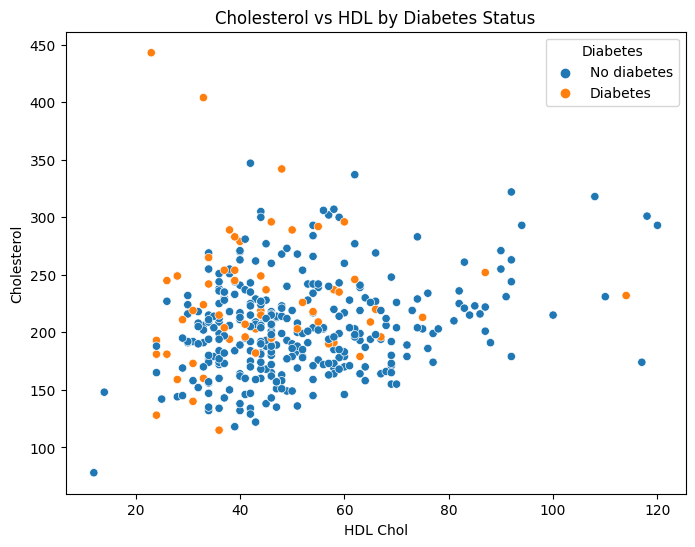

In [ ]:
"""### Cholesterol vs HDL (colored by Diabetes)
if 'Cholesterol' in african_df.columns and 'HDL Chol' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='HDL Chol', y='Cholesterol', hue='Diabetes')
    plt.title("Cholesterol vs HDL by Diabetes Status")
    plt.show()"""

### Systolic BP vs Diastolic BP

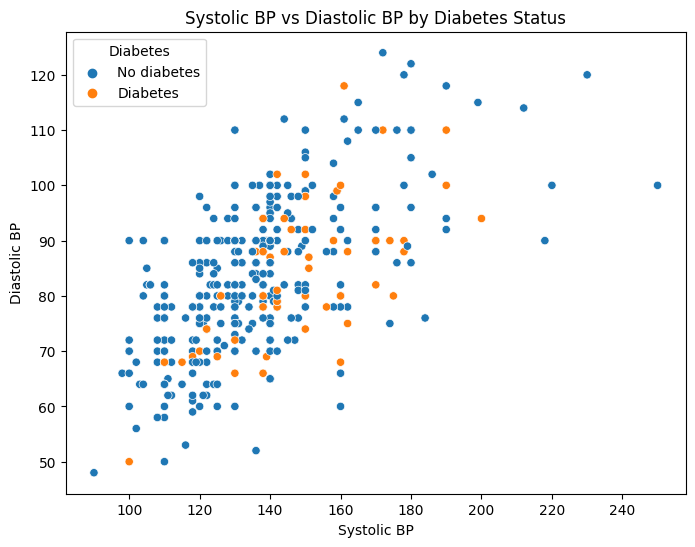

In [ ]:
"""### Systolic BP vs Diastolic BP
if 'Systolic BP' in african_df.columns and 'Diastolic BP' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='Systolic BP', y='Diastolic BP', hue='Diabetes')
    plt.title("Systolic BP vs Diastolic BP by Diabetes Status")
    plt.show()"""

### Age Distribution by Diabetes Status

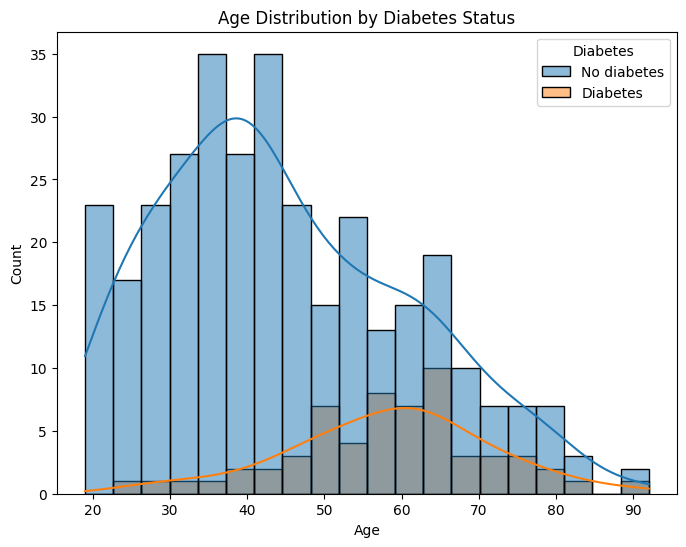

In [ ]:
"""### Age Distribution by Diabetes Status
if 'Age' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=african_df, x='Age', hue='Diabetes', kde=True, bins=20)
    plt.title("Age Distribution by Diabetes Status")
    plt.show()"""

# Feature Engineering

#### Convert 'Gender' column to numerical

In [30]:
if 'Gender' in african_df.columns:
    le = LabelEncoder()
    african_df['Gender'] = le.fit_transform(african_df['Gender'])
    print("\n'Gender' column converted to numerical:")
    print(african_df[['Gender']].head())


'Gender' column converted to numerical:
   Gender
0       0
1       0
2       0
3       0
4       0


####  Convert 'Diabetes' column to numerical

In [31]:
if 'Diabetes' in african_df.columns:
    african_df['Diabetes'] = african_df['Diabetes'].map({'No diabetes': 0, 'Diabetes': 1})
    print("\n'Diabetes' column converted to 0 and 1:")
    print(african_df[['Diabetes']].head())


'Diabetes' column converted to 0 and 1:
   Diabetes
0         0
1         0
2         0
3         0
4         0


### Encoded BMI Category to numircal 

In [32]:
# Convert BMI Categories to numerical
if 'BMI Category' in african_df.columns:
    bmi_mapping = {"Underweight": 0, "Normal": 1, "Overweight": 2, "Obese": 3}
    african_df['BMI Category'] = african_df['BMI Category'].map(bmi_mapping)
    print("\n'BMI Category' column converted to numerical:")
    print(african_df[['BMI Category']].head())


'BMI Category' column converted to numerical:
   BMI Category
0             1
1             2
2             2
3             1
4             1


In [33]:
african_df.head()

Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age  \
0               1          193       77        49             3.9   19   
1               2          146       79        41             3.6   19   
2               3          217       75        54             4.0   20   
3               4          226       97        70             3.2   20   
4               5          164       91        67             2.4   20   

   Gender  Height  Weight   BMI  Systolic BP  Diastolic BP  waist  hip  \
0       0      61     119  22.5          118            70     32   38   
1       0      60     135  26.4          108            58     33   40   
2       0      67     187  29.3          110            72     40   45   
3       0      64     114  19.6          122            64     31   39   
4       0      70     141  20.2          122            86     32   39   

   Waist/hip ratio  Diabetes  BMI Category  
0             0.84         0             1  
1             0.83         0             2  
2             0.89         0             2  
3             0.79         0             1  
4             0.82         0             1

# Saving Processed CSV File

In [35]:
# Define the exact output file path
output_file_path = r'C:\Users\dahab\OneDrive\Desktop\T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making\processed_datasets\clinical\African_pro.csv'

# Save the updated DataFrame to a CSV file
african_df.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to: {output_file_path}")

Updated dataset saved to: C:\Users\dahab\OneDrive\Desktop\T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making\processed_datasets\clinical\African_pro.csv


# Conclusion

# Dataset Source and Modifications

This dataset originated from Vanderbilt, but the original data was collected as part of a study of rural African Americans in Virginia. I made the following modifications and notes:

- **Data Cleaning**: 
  - Removed 13 patients who had missing data.
  - Diabetes diagnosis was originally based on a glycohemoglobin level greater than 7. Current guidelines use a glycohemoglobin of 6.5 or greater to diagnose diabetes.

- **New Ratios Created**:
  - Added a **Total Cholesterol/HDL Cholesterol Ratio**, which is now commonly used but was not part of the original data.
  - Added a **Waist-to-Hip Ratio**, also a common metric in contemporary studies.

### Reference
Williams JP, Saunders JT, Hunt DE, Schorling JB. *Prevalence of coronary risk factors among rural blacks: A community-based study.* Southern Medical Journal. 1997;90:814-820.